# Assignment
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


**For each question, make sure to:**

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# Load Libraries/Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Q1. Do smokers have higher insurance charges than non-smokers?**

In [3]:
smoke_df = df[df['smoker'] == 'yes']
no_smoke_df = df[df['smoker'] == 'no']

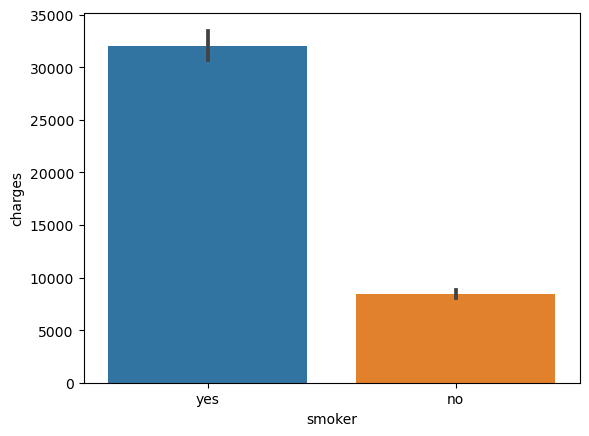

In [4]:
sns.barplot(data=df, x='smoker', y='charges');

## 1. State your Null Hypothesis and Alternative Hypothesis
- **Null Hypothesis**: smokers and non-smokers are charged for insurance at the same rate


- **Alternative Hypothesis**: smokers and non-smokers are charged differently for insurance
    - Could be that smokers are charged more
    

- Alpha = 0.05

## 2. Select the correct test according to the data type and number of samples
- Independent T-test
    - 2 samples are compared

## 3. Test the assumptions of your selected test

### Outliers

In [5]:
#smokers
print(f'Number of rows: {len(smoke_df)}')

z_smokers = stats.zscore(smoke_df['charges'])
outliers_smokers = abs(z_smokers)>3

print(f'Number of outliers: {np.sum(outliers_smokers)}')

smoke_df = smoke_df[~outliers_smokers]
print(f'Number of rows: {len(smoke_df)}')

Number of rows: 274
Number of outliers: 0
Number of rows: 274


In [6]:
#non-smokers
print(f'Number of rows: {len(no_smoke_df)}')

z_non_smokers = stats.zscore(no_smoke_df['charges'])
outliers_no_smokers = abs(z_non_smokers)>3

print(f'Number of outliers: {np.sum(outliers_no_smokers)}')

no_smoke_df = no_smoke_df[~outliers_no_smokers]
print(f'Number of rows: {len(no_smoke_df)}')

Number of rows: 1064
Number of outliers: 24
Number of rows: 1040


### Normality
- Normality is not met
- Sample size > 15 for both groups
    - Can proceed

In [7]:
norm_smoker = stats.normaltest(smoke_df['charges'])
norm_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [8]:
norm_non_smoker = stats.normaltest(no_smoke_df['charges'])
norm_non_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

### Equal Variance
- Equal Variance is not met
- Will add `equal_var=False` to argument for `ttest_ind`

In [9]:
equal_var = stats.levene(smoke_df['charges'], no_smoke_df['charges'])
equal_var

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [10]:
result1 = stats.ttest_ind(smoke_df['charges'], no_smoke_df['charges'], equal_var=False)
result1

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [11]:
## is our result significant
print(f"p-value={result1.pvalue:.10f}")
print(f"Significant: {result1.pvalue <.05}")

p-value=0.0000000000
Significant: True


## 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- p-value is significantly less than alpha (0.05)
- Reject null hypothesis and accept that there is a significant difference in insurance charges between smokers and non-smokers

## 6. Show a supporting visualization that helps display the result

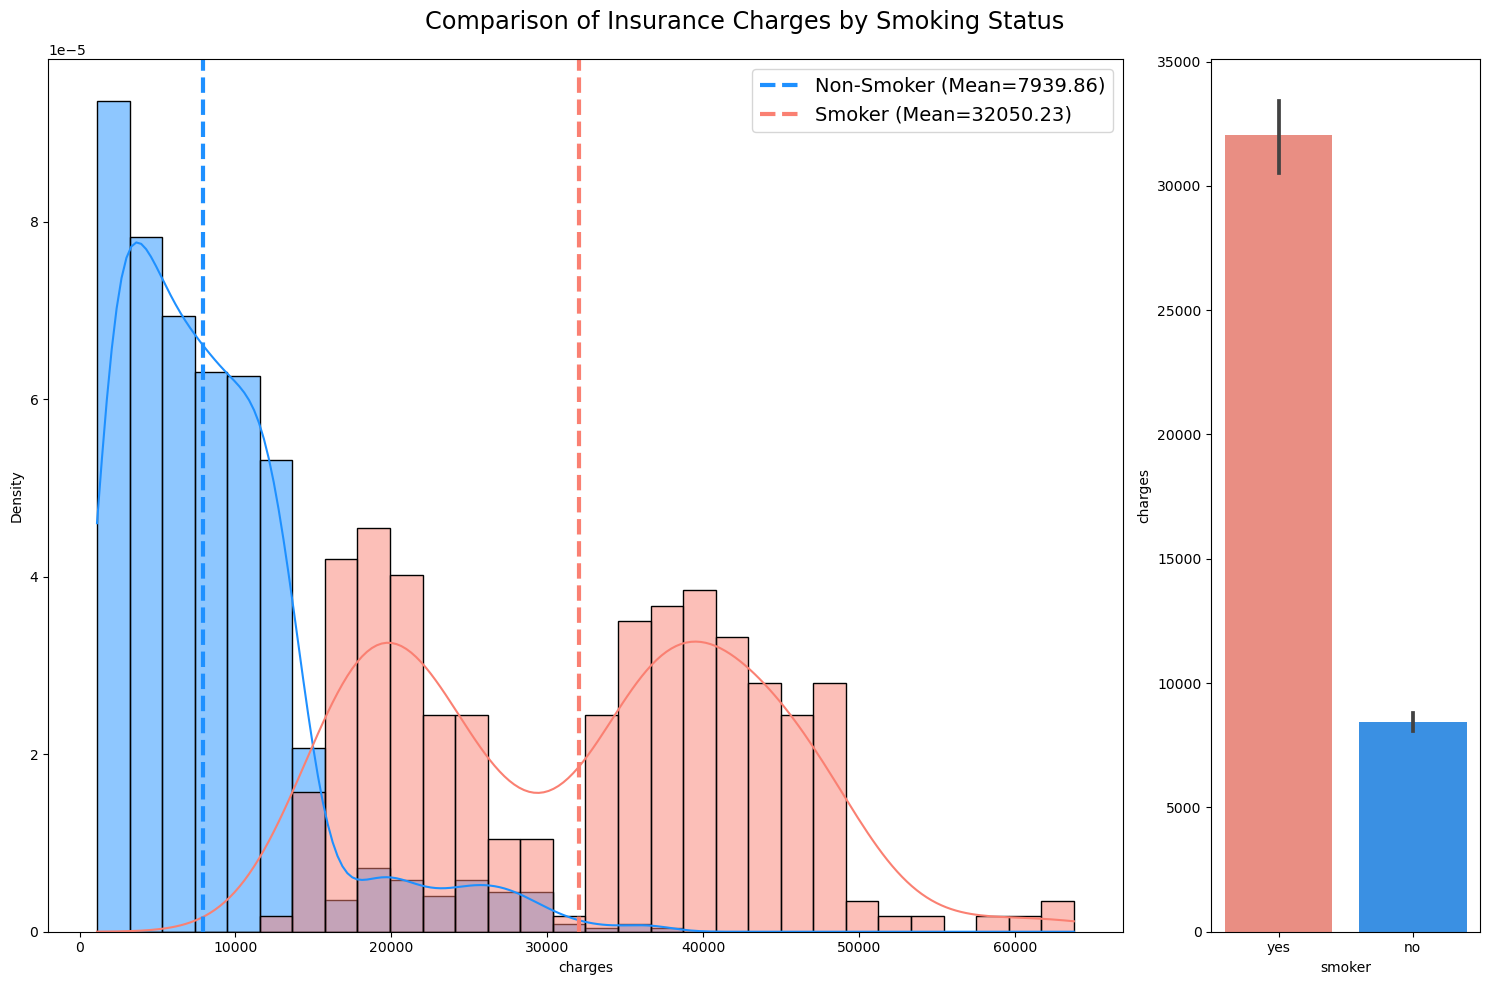

In [12]:
smoker_palette={'no':'dodgerblue', 'yes':'salmon'}

## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (15, 10), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})

# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(no_smoke_df['charges']), ls='--',lw=3, 
           label=f"Non-Smoker (Mean={np.mean(no_smoke_df['charges']):.2f})",color=smoker_palette['no'])

ax.axvline(np.mean(smoke_df['charges']), ls='--', lw=3, 
           label=f"Smoker (Mean={np.mean(smoke_df['charges']):.2f})",color=smoker_palette['yes'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Insurance Charges by Smoking Status',fontsize='xx-large')
fig.tight_layout();

# **Q2. Are men more likely to smoke than women?**

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
men_smoke = df.loc[df['sex'] == 'male', 'smoker']
women_smoke = df.loc[df['sex'] == 'female', 'smoker']

## 1. State your Null Hypothesis and Alternative Hypothesis
- **Null Hypothesis**: there is no difference in the rate of smokers between men and women


- **Alternative Hypothesis**: there is a difference in the rate of smokers between men and women


- Alpha: 0.05

## 2. Select the correct test according to the data type and number of samples
- Chi-Square
    - Categorical data with 2 groups

## 3. Test the assumptions of your selected test

### Two Categorical Variables (Ordinal or Nominal)
- Meets assumption
- Two categorical variables:
    - 'sex': male or female
    - 'smoker': yes or no

### Independent Outcomes

In [15]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [16]:
result2 = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result2

In [17]:
print(p)
p < 0.05

0.006548143503580696


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- p-value is less than alpha (0.05)
    - There is a significant result
- Reject null hypothesis and accept that there is a difference in the rate of smokers between males and females

## 6. Show a supporting visualization that helps display the result

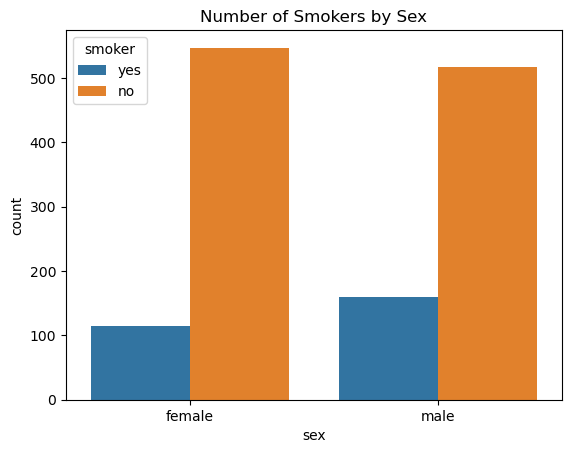

In [18]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

# **Q3. Do different regions have different charges, on average?**

In [19]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [20]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Separating Groups for Convenience

In [21]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## 1. State your Null Hypothesis and Alternative Hypothesis
- **Null Hypothesis**: there is no difference in average charges between regions


- **Alternative Hypothesis**: there is a difference in average charges between regions


- Alpha: 0.05

## 2. Select the correct test according to the data type and number of samples
- ANOVA
    - There are more than 2 groups (4 total)
    - Comparing numeric averages ('charges')

## 3. Test the assumptions of your selected test

### Outliers

In [22]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [23]:
for i in groups:
    print(f'{i} - Number of rows: {len(groups[i])}')
    z_score = stats.zscore(groups[i])
    outliers = abs(z_score)>3
    print(f'{i} - Number of outliers: {np.sum(outliers)}')
    
    groups[i] = groups[i][~outliers]
    print(f'{i} - Number of rows: {len(groups[i])}')
    print('')

southwest - Number of rows: 325
southwest - Number of outliers: 8
southwest - Number of rows: 317

southeast - Number of rows: 364
southeast - Number of outliers: 2
southeast - Number of rows: 362

northwest - Number of rows: 325
northwest - Number of outliers: 7
northwest - Number of rows: 318

northeast - Number of rows: 324
northeast - Number of outliers: 4
northeast - Number of rows: 320



### Normality
- Does not meet Normality Assumption
- Can continue since there are 4 groups and each groups is greater than or equal to 15 samples

In [24]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [25]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


### Equal Variance
- Failed to meet equal variance assumption
    - p-value < 0.05
- Will use Nonparametric Test: **Kruskal-Wallis**

In [26]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [27]:
result3 = stats.kruskal( *groups.values())
result3

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

## 5. Interpret your p-value and reject or fail to reject your null hypothesis
- p-value > 0.05; will fail to reject null hypothesis
    - Accept that there is no difference in average charges between regions

## 6. Show a supporting visualization that helps display the result

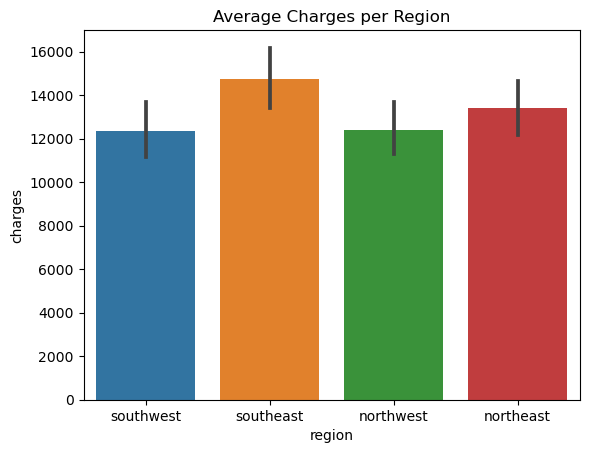

In [28]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_title('Average Charges per Region');